In [112]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

In [113]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [114]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


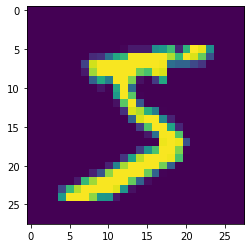

In [115]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [116]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [117]:
number_of_classes = 10
Y_train = np_utils.to_categorical(Y_train, number_of_classes)
Y_test = np_utils.to_categorical(Y_test, number_of_classes)


In [118]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [119]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [120]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [121]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 184s 98ms/step - loss: 0.2405 - accuracy: 0.9498 - val_loss: 0.0873 - val_accuracy: 0.9731
Epoch 2/5
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0699 - accuracy: 0.9782 - val_loss: 0.0936 - val_accuracy: 0.9700
Epoch 3/5
1875/1875 [==============================] - 183s 98ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0778 - val_accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 183s 97ms/step - loss: 0.0365 - accuracy: 0.9882 - val_loss: 0.0887 - val_accuracy: 0.9750
Epoch 5/5
1875/1875 [==============================] - 181s 96ms/step - loss: 0.0259 - accuracy: 0.9914 - val_loss: 0.1013 - val_accuracy: 0.9762


In [123]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.10125470906496048, 0.9761999845504761]


In [124]:
prediction = model.predict(X_test[:4])

In [125]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [126]:
model.save("mnistCNN.h5")

In [138]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np
import pandas as pd

In [139]:
model=load_model("mnistCNN.h5")

In [140]:
for i in range(10):
    img = Image.open(f"./Data/{i}.png").convert("L")
    img = ImageOps.invert(img)
    img = img.resize((28, 28))
    img2arr = np.array(img)
    img2arr = img2arr / 255.0
    img2arr = img2arr.reshape(1, 28, 28, 1)
    results  = model.predict(img2arr)
    results = np.argmax(results,axis = 1)
    results = pd.Series(results,name="Label")
    print(i, results)

0 0    0
Name: Label, dtype: int64
1 0    1
Name: Label, dtype: int64
2 0    2
Name: Label, dtype: int64
3 0    3
Name: Label, dtype: int64
4 0    4
Name: Label, dtype: int64
5 0    5
Name: Label, dtype: int64
6 0    6
Name: Label, dtype: int64
7 0    7
Name: Label, dtype: int64
8 0    8
Name: Label, dtype: int64
9 0    9
Name: Label, dtype: int64
